# ***Data train.csv***

## **Import Libraries**

In [1]:
from scipy.stats import mode
from scipy.stats import boxcox
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RANSACRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

## **Import Data Train**

In [2]:
df_train = pd.read_csv('train.csv')
#df_train.drop('customer_id', axis=1, inplace=True)
df_train

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15687492,596,jabar,Male,32.0,3.0,150268487.1,2.0,0.0,0.0,6.493161e+07,0
1,15736963,623,Jawa Timur,Male,43.0,1.0,0.0,2.0,1.0,1.0,2.274471e+08,0
2,15721730,601,Jawa Tengah,Female,44.0,4.0,0.0,2.0,1.0,0.0,9.099373e+07,0
3,15762134,506,Jawa Barat,Male,59.0,8.0,185140916.0,2.0,1.0,1.0,2.652056e+08,0
4,15648898,560,Jawa Tengah,Female,27.0,NaN,194221253.6,1.0,1.0,1.0,1.781762e+08,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6995,15702741,601,Jawa Timur,Male,32.0,8.0,144525288.7,1.0,1.0,0.0,1.351162e+08,0
6996,15721207,625,jawabarat,Male,42.0,6.0,155455542.3,NaN,1.0,0.0,1.451733e+08,0
6997,15603246,498,jawatimur,Male,73.0,2.0,264524958.3,2.0,1.0,1.0,2.570142e+08,0
6998,15734674,593,Jawa Timur,Female,41.0,6.0,0.0,1.0,1.0,0.0,1.012635e+08,0


## **Pengecekan Data**

### Cek Tipe Data

In [3]:
df_train_dtypes = pd.DataFrame({'Columns':df_train.columns})

lst_nilai = []
for i in df_train_dtypes['Columns']:
  lst_nilai.append(df_train[[i]].sample(1).values[[0]])

df_train_dtypes['Value'] = lst_nilai
df_train_dtypes['Data Types'] = df_train.dtypes.values

df_train_dtypes = df_train_dtypes.reset_index().drop(columns = ['index'])
df_train_dtypes

,Columns,Value,Data Types
0,customer_id,[[15670416]],int64
1,credit_score,[[649]],int64
2,country,[[Jawa Timur]],object
3,gender,[[Male]],object
4,age,[[37.0]],float64
5,tenure,[[9.0]],float64
6,balance,[[221265164.4]],float64
7,products_number,[[1.0]],float64
8,credit_card,[[0.0]],float64
9,active_member,[[0.0]],float64


In [4]:
#Pembuktian jumlah sampel dari data yang telah diimpor
df_train.shape

(7000, 12)

In [5]:
print(df_train['country'].unique())
print(df_train['gender'].unique())

['jabar' 'Jawa Timur' 'Jawa Tengah' 'Jawa Barat' 'jateng' 'jawabarat'
 'jawatimur' 'jatim' 'jawatengah' nan]
['Male' 'Female']


In [6]:
# Misalkan 'provinsi' adalah kolom yang berisi informasi provinsi
df_train['country'] = df_train['country'].replace({'jabar': 'Jawa Barat', 'jawabarat': 'Jawa Barat', 'jateng' : 'Jawa Tengah', 'jawatengah' : 'Jawa Tengah', 'jawatimur' : 'Jawa Timur', 'jatim' : 'Jawa Timur'})
df_train

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15687492,596,Jawa Barat,Male,32.0,3.0,150268487.1,2.0,0.0,0.0,6.493161e+07,0
1,15736963,623,Jawa Timur,Male,43.0,1.0,0.0,2.0,1.0,1.0,2.274471e+08,0
2,15721730,601,Jawa Tengah,Female,44.0,4.0,0.0,2.0,1.0,0.0,9.099373e+07,0
3,15762134,506,Jawa Barat,Male,59.0,8.0,185140916.0,2.0,1.0,1.0,2.652056e+08,0
4,15648898,560,Jawa Tengah,Female,27.0,NaN,194221253.6,1.0,1.0,1.0,1.781762e+08,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6995,15702741,601,Jawa Timur,Male,32.0,8.0,144525288.7,1.0,1.0,0.0,1.351162e+08,0
6996,15721207,625,Jawa Barat,Male,42.0,6.0,155455542.3,NaN,1.0,0.0,1.451733e+08,0
6997,15603246,498,Jawa Timur,Male,73.0,2.0,264524958.3,2.0,1.0,1.0,2.570142e+08,0
6998,15734674,593,Jawa Timur,Female,41.0,6.0,0.0,1.0,1.0,0.0,1.012635e+08,0


### Analisis Deskriptif

In [7]:
def statistika_deskriptif(data):
    # Mendapatkan hanya kolom-kolom numerik
    kolom_numerik = data.select_dtypes(include=[np.number])

    # Inisialisasi vektor kosong untuk menyimpan hasil perhitungan
    variables = kolom_numerik.columns
    means, medians, q1s, q3s, variances, sds, ranges, sums, mins, maxs = ([] for _ in range(10))

    # Loop untuk setiap variabel numerik
    for variable in variables:
        values = kolom_numerik[variable]

        # Hitung statistika deskriptif
        means.append(np.mean(values))
        medians.append(np.median(values))
        q1s.append(np.percentile(values, 25))
        q3s.append(np.percentile(values, 75))
        variances.append(np.var(values))
        sds.append(np.std(values))
        ranges.append(np.max(values) - np.min(values))
        sums.append(np.sum(values))
        mins.append(np.min(values))
        maxs.append(np.max(values))

    hasil = pd.DataFrame({
        'Variabel': variables,
        'Mean': means,
        'Median': medians,
        'Q1': q1s,
        'Q3': q3s,
        'Variance': variances,
        'SD': sds,
        'Range': ranges,
        'Sum': sums,
        'Min': mins,
        'Max': maxs
    })

    return hasil


In [8]:
statistika_deskriptif(df_train)

,Variabel,Mean,Median,Q1,Q3,Variance,SD,Range,Sum,Min,Max
0,customer_id,1.569149e+07,15691160.0,15628850.5,15754545.0,5.226697e+09,7.229590e+04,2.499890e+05,1.098404e+11,1.556570e+07,1.581569e+07
1,credit_score,6.499797e+02,652.0,583.0,717.0,9.437671e+03,9.714768e+01,5.000000e+02,4.549858e+06,3.500000e+02,8.500000e+02
2,age,3.890250e+01,NaN,NaN,NaN,1.097770e+02,1.047745e+01,7.400000e+01,2.629420e+05,1.800000e+01,9.200000e+01
3,tenure,5.050805e+00,NaN,NaN,NaN,8.400130e+00,2.898298e+00,1.000000e+01,3.390100e+04,0.000000e+00,1.000000e+01
4,balance,1.289241e+08,NaN,NaN,NaN,1.949482e+16,1.396239e+08,1.712257e+09,8.873847e+11,0.000000e+00,1.712257e+09
5,products_number,1.537215e+00,NaN,NaN,NaN,3.393914e-01,5.825731e-01,3.000000e+00,1.053300e+04,1.000000e+00,4.000000e+00
6,credit_card,7.025289e-01,NaN,NaN,NaN,2.089821e-01,4.571456e-01,1.000000e+00,4.806000e+03,0.000000e+00,1.000000e+00
7,active_member,5.123124e-01,NaN,NaN,NaN,2.498484e-01,4.998484e-01,1.000000e+00,3.516000e+03,0.000000e+00,1.000000e+00
8,estimated_salary,1.674342e+08,NaN,NaN,NaN,2.121378e+16,1.456495e+08,1.606571e+09,1.147761e+12,1.799324e+04,1.606589e+09
9,churn,2.014286e-01,0.0,0.0,0.0,1.608551e-01,4.010675e-01,1.000000e+00,1.410000e+03,0.000000e+00,1.000000e+00


### Rangkuman Data

In [9]:
summary_stats = df_train.describe()
print(summary_stats)

        customer_id  credit_score          age       tenure       balance  \
count  7.000000e+03   7000.000000  6759.000000  6712.000000  6.883000e+03   
mean   1.569149e+07    649.979714    38.902500     5.050805  1.289241e+08   
std    7.230107e+04     97.154616    10.478227     2.898514  1.396340e+08   
min    1.556570e+07    350.000000    18.000000     0.000000  0.000000e+00   
25%    1.562885e+07    583.000000    32.000000     3.000000  0.000000e+00   
50%    1.569116e+07    652.000000    37.000000     5.000000  1.520481e+08   
75%    1.575454e+07    717.000000    44.000000     8.000000  1.992249e+08   
max    1.581569e+07    850.000000    92.000000    10.000000  1.712257e+09   

       products_number  credit_card  active_member  estimated_salary  \
count      6852.000000  6841.000000    6863.000000      6.855000e+03   
mean          1.537215     0.702529       0.512312      1.674342e+08   
std           0.582616     0.457179       0.499885      1.456601e+08   
min           1.00

## **Prepocessing Data**

### Cek Missing Values

In [10]:
df_train.isnull().sum()

customer_id           0
credit_score          0
country             155
gender                0
age                 241
tenure              288
balance             117
products_number     148
credit_card         159
active_member       137
estimated_salary    145
churn                 0
dtype: int64

In [11]:

lst_missval = []

for i in df_train.isnull().sum():
  lst_missval.append((i / len(df_train) * 100))

df_train_missval = pd.DataFrame({'Column Name':df_train.columns,
                           'Missing Value Percentage (%)':np.round(lst_missval,2),
                           'Data Types':df_train.dtypes})

df_train_missval = df_train_missval.sort_values(by='Missing Value Percentage (%)',
                       ascending = False).reset_index().drop(columns = 'index')

df_train_missval

,Column Name,Missing Value Percentage (%),Data Types
0,tenure,4.11,float64
1,age,3.44,float64
2,credit_card,2.27,float64
3,country,2.21,object
4,products_number,2.11,float64
5,estimated_salary,2.07,float64
6,active_member,1.96,float64
7,balance,1.67,float64
8,customer_id,0.00,int64
9,credit_score,0.00,int64


In [12]:
# Pengecekan nilai 0
nilai_nol = (df_train == 0).any().any()

if nilai_nol:
    print("Ada nilai 0 dalam DataFrame.")
else:
    print("Tidak ada nilai 0 dalam DataFrame.")

# Pengecekan nilai 0 per kolom
nilai_nol_per_kolom = (df_train == 0).any(axis=0)

if nilai_nol_per_kolom.any():
    print("Ada nilai 0 dalam satu atau lebih kolom.")
    kolom_dengan_nol = nilai_nol_per_kolom.index[nilai_nol_per_kolom].tolist()
    print("Kolom dengan nilai 0:", kolom_dengan_nol)
else:
    print("Tidak ada nilai 0 dalam semua kolom.")

Ada nilai 0 dalam DataFrame.
Ada nilai 0 dalam satu atau lebih kolom.
Kolom dengan nilai 0: ['tenure', 'balance', 'credit_card', 'active_member', 'churn']


### Handling Missing Values

In [13]:
median_tenure = np.median(df_train['tenure'].dropna())
#mode_tenure = df_train['tenure'].mode()[0]
median_age = np.median(df_train['age'].dropna())
mode_credit = df_train['credit_card'].mode()[0]
mode_country = df_train['country'].mode()[0]
median_products = np.median(df_train['products_number'].dropna())
#mode_products = df_train['products_number'].mode()[0]
median_salary = np.median(df_train['estimated_salary'].dropna())
mode_member = df_train['active_member'].mode()[0]
median_balance = np.median(df_train['balance'].dropna())

In [14]:
df_train['tenure'].fillna(median_tenure, inplace=True)
#df_train['tenure'].fillna(mode_tenure, inplace=True)
df_train['age'].fillna(median_age, inplace=True)
df_train['credit_card'].fillna(mode_credit, inplace=True)
df_train['country'].fillna(mode_country, inplace=True)
df_train['products_number'].fillna(median_products, inplace=True)
#df_train['products_number'].fillna(mode_products, inplace=True)
df_train['estimated_salary'].fillna(median_salary, inplace=True)
df_train['active_member'].fillna(mode_member, inplace=True)
df_train['balance'].fillna(median_balance, inplace=True)
df_train

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15687492,596,Jawa Barat,Male,32.0,3.0,150268487.1,2.0,0.0,0.0,6.493161e+07,0
1,15736963,623,Jawa Timur,Male,43.0,1.0,0.0,2.0,1.0,1.0,2.274471e+08,0
2,15721730,601,Jawa Tengah,Female,44.0,4.0,0.0,2.0,1.0,0.0,9.099373e+07,0
3,15762134,506,Jawa Barat,Male,59.0,8.0,185140916.0,2.0,1.0,1.0,2.652056e+08,0
4,15648898,560,Jawa Tengah,Female,27.0,5.0,194221253.6,1.0,1.0,1.0,1.781762e+08,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6995,15702741,601,Jawa Timur,Male,32.0,8.0,144525288.7,1.0,1.0,0.0,1.351162e+08,0
6996,15721207,625,Jawa Barat,Male,42.0,6.0,155455542.3,1.0,1.0,0.0,1.451733e+08,0
6997,15603246,498,Jawa Timur,Male,73.0,2.0,264524958.3,2.0,1.0,1.0,2.570142e+08,0
6998,15734674,593,Jawa Timur,Female,41.0,6.0,0.0,1.0,1.0,0.0,1.012635e+08,0


In [15]:
lst_missval = []

for i in df_train.isnull().sum():
  lst_missval.append((i / len(df_train) * 100))

df_train_missval = pd.DataFrame({'Column Name':df_train.columns,
                           'Missing Value Percentage (%)':np.round(lst_missval,2),
                           'Data Types':df_train.dtypes})

df_train_missval = df_train_missval.sort_values(by='Missing Value Percentage (%)',
                       ascending = False).reset_index().drop(columns = 'index')

df_train_missval

,Column Name,Missing Value Percentage (%),Data Types
0,customer_id,0.0,int64
1,credit_score,0.0,int64
2,country,0.0,object
3,gender,0.0,object
4,age,0.0,float64
5,tenure,0.0,float64
6,balance,0.0,float64
7,products_number,0.0,float64
8,credit_card,0.0,float64
9,active_member,0.0,float64


### Cek Outlier

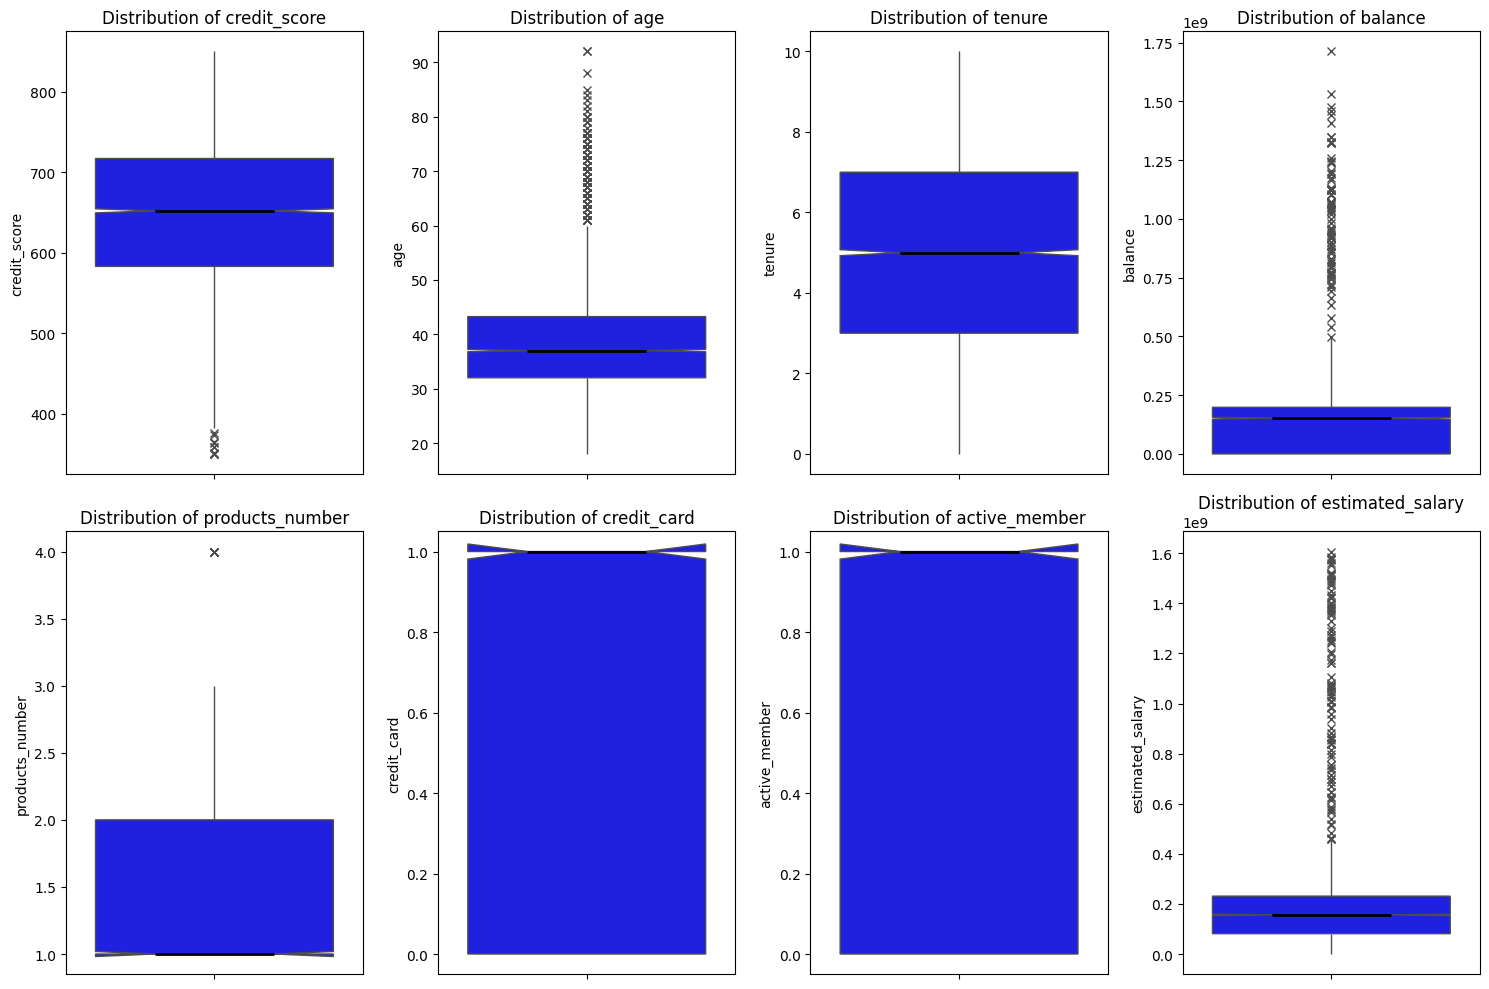

In [16]:
# Boxplot
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))
kolom = ('credit_score','age','tenure','balance','products_number', 'credit_card', 'active_member', 'estimated_salary')
axes = axes.flatten()
for i, col in enumerate(kolom):
  sns.boxplot(df_train[col],color='blue',ax=axes[i],notch=True, showcaps=False,
    flierprops={"marker": "x"},
    medianprops={"color": "black", "linewidth": 2})
  axes[i].set_title(f'Distribution of {col}')

for j in range(len(kolom), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Handling Outlier

In [17]:
def remove_outliers_iqr(data, variables, threshold=1.5):
    data_copy = data.copy()
    for variable in variables:
        q1 = data_copy[variable].quantile(0.25)
        q3 = data_copy[variable].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - threshold * iqr
        upper_bound = q3 + threshold * iqr
        data_copy = data_copy[(data_copy[variable] >= lower_bound) & (data_copy[variable] <= upper_bound)]
    return data_copy

variables_to_check = ["credit_score", "age", "tenure", "balance", "estimated_salary"]
df_train_no = remove_outliers_iqr(df_train, variables_to_check)
df_train_no

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15687492,596,Jawa Barat,Male,32.0,3.0,150268487.1,2.0,0.0,0.0,6.493161e+07,0
1,15736963,623,Jawa Timur,Male,43.0,1.0,0.0,2.0,1.0,1.0,2.274471e+08,0
2,15721730,601,Jawa Tengah,Female,44.0,4.0,0.0,2.0,1.0,0.0,9.099373e+07,0
3,15762134,506,Jawa Barat,Male,59.0,8.0,185140916.0,2.0,1.0,1.0,2.652056e+08,0
4,15648898,560,Jawa Tengah,Female,27.0,5.0,194221253.6,1.0,1.0,1.0,1.781762e+08,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6994,15727384,705,Jawa Barat,Female,43.0,10.0,227708871.5,1.0,0.0,1.0,1.565093e+07,1
6995,15702741,601,Jawa Timur,Male,32.0,8.0,144525288.7,1.0,1.0,0.0,1.351162e+08,0
6996,15721207,625,Jawa Barat,Male,42.0,6.0,155455542.3,1.0,1.0,0.0,1.451733e+08,0
6998,15734674,593,Jawa Timur,Female,41.0,6.0,0.0,1.0,1.0,0.0,1.012635e+08,0


### EDA

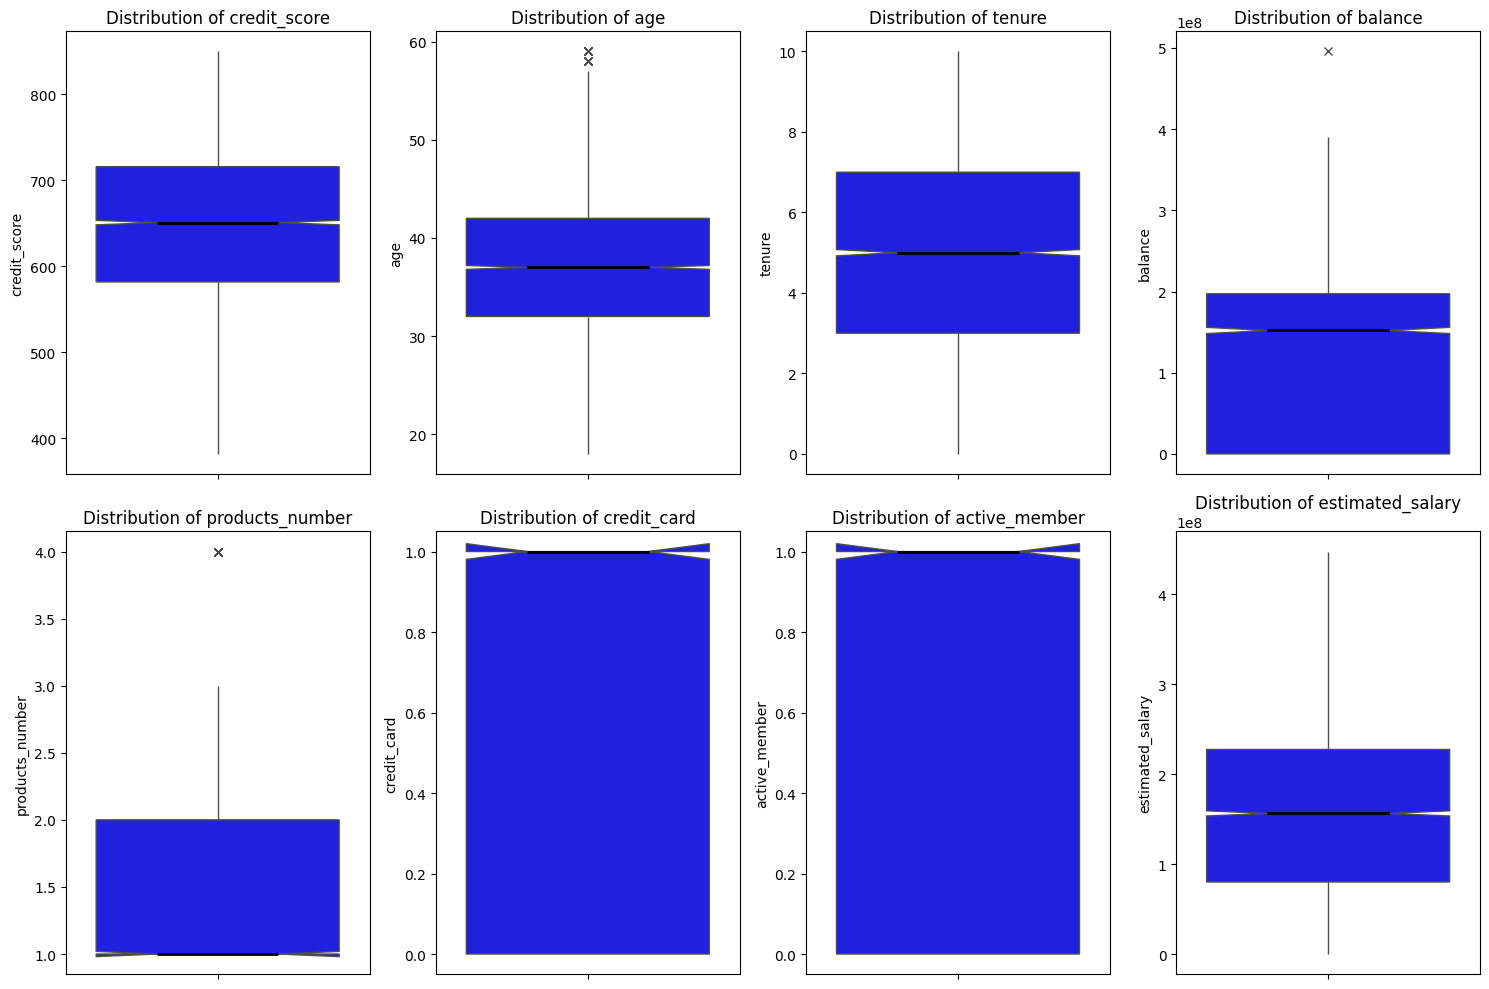

In [18]:
# Boxplot
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))
kolom = ('credit_score','age','tenure','balance','products_number', 'credit_card', 'active_member', 'estimated_salary')
axes = axes.flatten()
for i, col in enumerate(kolom):
  sns.boxplot(df_train_no[col],color='blue',ax=axes[i],notch=True, showcaps=False,
    flierprops={"marker": "x"},
    medianprops={"color": "black", "linewidth": 2})
  axes[i].set_title(f'Distribution of {col}')

for j in range(len(kolom), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

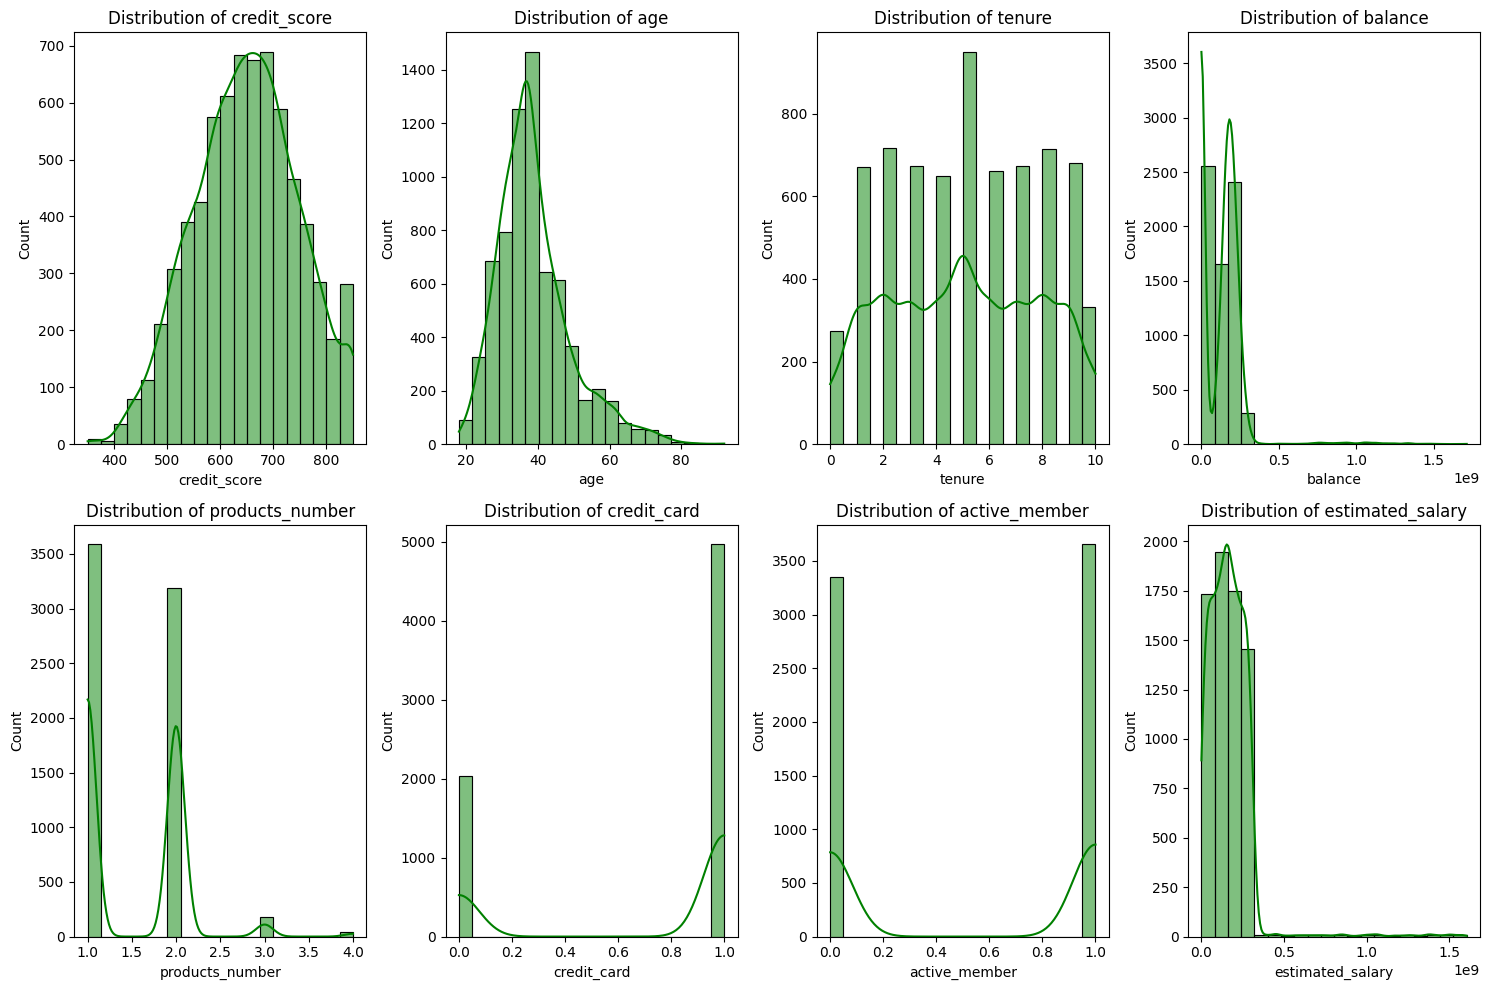

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dataframe df_test harus sudah didefinisikan sebelumnya

# Histogram
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))
kolom = ('credit_score', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary')
axes = axes.flatten()

for i, col in enumerate(kolom):
    sns.histplot(df_train[col], bins=20, color='green', kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

for j in range(len(kolom), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### Transformasi Data

In [20]:
kolom_int = ['age', 'tenure', 'products_number', 'credit_card', 'active_member']
df_train[kolom_int] = df_train[kolom_int].astype(int)
df_train

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15687492,596,Jawa Barat,Male,32,3,150268487.1,2,0,0,6.493161e+07,0
1,15736963,623,Jawa Timur,Male,43,1,0.0,2,1,1,2.274471e+08,0
2,15721730,601,Jawa Tengah,Female,44,4,0.0,2,1,0,9.099373e+07,0
3,15762134,506,Jawa Barat,Male,59,8,185140916.0,2,1,1,2.652056e+08,0
4,15648898,560,Jawa Tengah,Female,27,5,194221253.6,1,1,1,1.781762e+08,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6995,15702741,601,Jawa Timur,Male,32,8,144525288.7,1,1,0,1.351162e+08,0
6996,15721207,625,Jawa Barat,Male,42,6,155455542.3,1,1,0,1.451733e+08,0
6997,15603246,498,Jawa Timur,Male,73,2,264524958.3,2,1,1,2.570142e+08,0
6998,15734674,593,Jawa Timur,Female,41,6,0.0,1,1,0,1.012635e+08,0


In [21]:
from sklearn.preprocessing import LabelEncoder

akhir_train = pd.get_dummies(df_train.copy(), columns=['country', 'gender', 'credit_card', 'active_member', 'products_number'], prefix=['country', 'gender', 'credit_card', 'active_member', 'products_number'])
akhir_train

,customer_id,credit_score,age,tenure,balance,estimated_salary,churn,country_Jawa Barat,country_Jawa Tengah,country_Jawa Timur,gender_Female,gender_Male,credit_card_0,credit_card_1,active_member_0,active_member_1,products_number_1,products_number_2,products_number_3,products_number_4
0,15687492,596,32,3,150268487.1,6.493161e+07,0,1,0,0,0,1,1,0,1,0,0,1,0,0
1,15736963,623,43,1,0.0,2.274471e+08,0,0,0,1,0,1,0,1,0,1,0,1,0,0
2,15721730,601,44,4,0.0,9.099373e+07,0,0,1,0,1,0,0,1,1,0,0,1,0,0
3,15762134,506,59,8,185140916.0,2.652056e+08,0,1,0,0,0,1,0,1,0,1,0,1,0,0
4,15648898,560,27,5,194221253.6,1.781762e+08,0,0,1,0,1,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,15702741,601,32,8,144525288.7,1.351162e+08,0,0,0,1,0,1,0,1,1,0,1,0,0,0
6996,15721207,625,42,6,155455542.3,1.451733e+08,0,1,0,0,0,1,0,1,1,0,1,0,0,0
6997,15603246,498,73,2,264524958.3,2.570142e+08,0,0,0,1,0,1,0,1,0,1,0,1,0,0
6998,15734674,593,41,6,0.0,1.012635e+08,0,0,0,1,1,0,0,1,1,0,1,0,0,0


In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler

# Kolom yang akan di-transformasi akar kuadrat
kolom_transform = ['credit_score', 'age', 'balance', 'estimated_salary']

# Transformasi akar kuadrat
train = akhir_train.copy()
train[kolom_transform] = train[kolom_transform].apply(lambda x: np.sqrt(x))
train

,customer_id,credit_score,age,tenure,balance,estimated_salary,churn,country_Jawa Barat,country_Jawa Tengah,country_Jawa Timur,gender_Female,gender_Male,credit_card_0,credit_card_1,active_member_0,active_member_1,products_number_1,products_number_2,products_number_3,products_number_4
0,15687492,24.413111,5.656854,3,12258.404753,8058.014958,0,1,0,0,0,1,1,0,1,0,0,1,0,0
1,15736963,24.959968,6.557439,1,0.000000,15081.348875,0,0,0,1,0,1,0,1,0,1,0,1,0,0
2,15721730,24.515301,6.633250,4,0.000000,9539.063618,0,0,1,0,1,0,0,1,1,0,0,1,0,0
3,15762134,22.494444,7.681146,8,13606.649698,16285.134129,0,1,0,0,0,1,0,1,0,1,0,1,0,0
4,15648898,23.664319,5.196152,5,13936.328555,13348.266296,0,0,1,0,1,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,15702741,24.515301,5.656854,8,12021.867105,11623.948481,0,0,0,1,0,1,0,1,1,0,1,0,0,0
6996,15721207,25.000000,6.480741,6,12468.181195,12048.789354,0,1,0,0,0,1,0,1,1,0,1,0,0,0
6997,15603246,22.315914,8.544004,2,16264.223262,16031.662309,0,0,0,1,0,1,0,1,0,1,0,1,0,0
6998,15734674,24.351591,6.403124,6,0.000000,10062.975450,0,0,0,1,1,0,0,1,1,0,1,0,0,0


### Reduksi Dimensi

<AxesSubplot: >

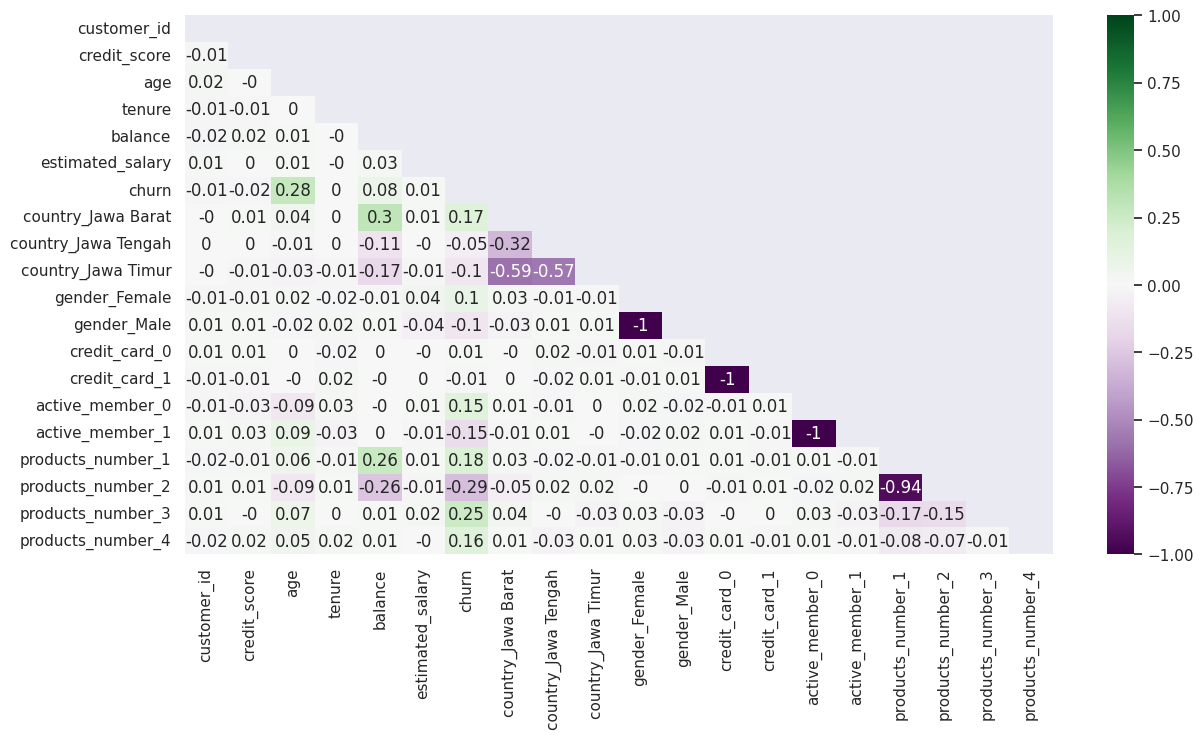

In [23]:
import numpy as np

#untuk mengetahui korelasi linier antar variabel
mask = np.triu(np.ones_like(akhir_train.corr())) #agar yang muncul segitiga bawah

# annot = True untuk mencetak/ menampilkan nilai korelasi di dalam kotak
sns.set(rc={'figure.figsize':(14,7)})
sns.heatmap(akhir_train.corr(method='pearson').round(2), annot=True, cmap='PRGn', mask=mask, vmin=-1, vmax=1)

In [24]:
correlation_matrix = akhir_train.corr()
print(correlation_matrix['churn'].sort_values(ascending=False))

churn                  1.000000
age                    0.282663
products_number_3      0.253689
products_number_1      0.182053
country_Jawa Barat     0.169240
products_number_4      0.156538
active_member_0        0.151041
gender_Female          0.100178
balance                0.080946
credit_card_0          0.014192
estimated_salary       0.008570
tenure                 0.001922
customer_id           -0.008694
credit_card_1         -0.014192
credit_score          -0.019078
country_Jawa Tengah   -0.054123
gender_Male           -0.100178
country_Jawa Timur    -0.100410
active_member_1       -0.151041
products_number_2     -0.288349
Name: churn, dtype: float64


In [25]:
drop_column = ['estimated_salary']
train = akhir_train.drop(columns= drop_column)
train

,customer_id,credit_score,age,tenure,balance,churn,country_Jawa Barat,country_Jawa Tengah,country_Jawa Timur,gender_Female,gender_Male,credit_card_0,credit_card_1,active_member_0,active_member_1,products_number_1,products_number_2,products_number_3,products_number_4
0,15687492,596,32,3,150268487.1,0,1,0,0,0,1,1,0,1,0,0,1,0,0
1,15736963,623,43,1,0.0,0,0,0,1,0,1,0,1,0,1,0,1,0,0
2,15721730,601,44,4,0.0,0,0,1,0,1,0,0,1,1,0,0,1,0,0
3,15762134,506,59,8,185140916.0,0,1,0,0,0,1,0,1,0,1,0,1,0,0
4,15648898,560,27,5,194221253.6,0,0,1,0,1,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,15702741,601,32,8,144525288.7,0,0,0,1,0,1,0,1,1,0,1,0,0,0
6996,15721207,625,42,6,155455542.3,0,1,0,0,0,1,0,1,1,0,1,0,0,0
6997,15603246,498,73,2,264524958.3,0,0,0,1,0,1,0,1,0,1,0,1,0,0
6998,15734674,593,41,6,0.0,0,0,0,1,1,0,0,1,1,0,1,0,0,0


In [26]:
statistika_deskriptif(akhir_train)

,Variabel,Mean,Median,Q1,Q3,Variance,SD,Range,Sum,Min,Max
0,customer_id,1.569149e+07,15691160.0,1.562885e+07,1.575454e+07,5.226697e+09,7.229590e+04,249989,1.098404e+11,15565701,15815690
1,credit_score,6.499797e+02,652.0,5.830000e+02,7.170000e+02,9.437671e+03,9.714768e+01,500,4.549858e+06,350,850
2,age,3.883700e+01,37.0,3.200000e+01,4.325000e+01,1.061179e+02,1.030135e+01,74,2.718590e+05,18,92
3,tenure,5.048714e+00,5.0,3.000000e+00,7.000000e+00,8.054627e+00,2.838067e+00,10,3.534100e+04,0,10
4,balance,1.293106e+08,152048077.2,0.000000e+00,1.984708e+08,1.917777e+16,1.384838e+08,1712256583.345,9.051743e+11,0.0,1712256583.345
5,estimated_salary,1.672043e+08,156337816.8,8.118582e+07,2.310516e+08,2.077685e+16,1.441418e+08,1606571476.8654,1.170430e+12,17993.2356,1606589470.101
6,churn,2.014286e-01,0.0,0.000000e+00,0.000000e+00,1.608551e-01,4.010675e-01,1,1.410000e+03,0,1
7,country_Jawa Barat,2.498571e-01,0.0,0.000000e+00,0.000000e+00,1.874286e-01,4.329302e-01,1,1.749000e+03,0,1
8,country_Jawa Tengah,2.388571e-01,0.0,0.000000e+00,0.000000e+00,1.818044e-01,4.263853e-01,1,1.672000e+03,0,1
9,country_Jawa Timur,5.112857e-01,1.0,0.000000e+00,1.000000e+00,2.498726e-01,4.998726e-01,1,3.579000e+03,0,1


## **Model**

### PyCaret

In [27]:
pip install pycaret

In [28]:
# Classification Functional API Example

# init setup
from pycaret.classification import *
s = setup(akhir_train, target = 'churn', session_id = 123)

# model training and selection
best = compare_models()

# evaluate trained model
evaluate_model(best)

# predict on hold-out/test set
pred_holdout = predict_model(best)

# predict on new data
final_data = akhir_train.copy().drop('churn', axis = 1)
predictions = predict_model(best, data = final_data)

,Description,Value
0,Session id,123
1,Target,churn
2,Target type,Binary
3,Original data shape,"(7000, 20)"
4,Transformed data shape,"(7000, 20)"
5,Transformed train set shape,"(4900, 20)"
6,Transformed test set shape,"(2100, 20)"
7,Numeric features,19
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8620,0.8616,0.4629,0.7590,0.5744,0.4979,0.5199,0.8530
rf,Random Forest Classifier,0.8584,0.8496,0.4428,0.7589,0.5569,0.4796,0.5055,0.7640
lightgbm,Light Gradient Boosting Machine,0.8561,0.8486,0.4782,0.7174,0.5723,0.4900,0.5055,1.4910
ada,Ada Boost Classifier,0.8529,0.8456,0.4620,0.7088,0.5588,0.4751,0.4912,0.2760
et,Extra Trees Classifier,0.8488,0.8310,0.4184,0.7124,0.5268,0.4440,0.4665,0.4690
xgboost,Extreme Gradient Boosting,0.8465,0.8337,0.4741,0.6701,0.5540,0.4647,0.4756,0.1910
lda,Linear Discriminant Analysis,0.8414,0.8375,0.3647,0.7096,0.4809,0.3985,0.4298,0.0560
ridge,Ridge Classifier,0.8380,0.0000,0.2715,0.7872,0.4028,0.3338,0.3980,0.0350
qda,Quadratic Discriminant Analysis,0.7986,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0400
dummy,Dummy Classifier,0.7986,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0490


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8619,0.8496,0.4563,0.7628,0.5710,0.4948,0.5181


### Gradient Boosting Clasifier

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

X = akhir_train.drop(columns=['churn'])
y = akhir_train['churn']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = GradientBoostingClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Tampilkan hasil evaluasi
print(f'Akurasi: {accuracy:.2f}')
print('Laporan Klasifikasi:\n', classification_rep)

Akurasi: 0.87
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93      1710
           1       0.77      0.46      0.58       390

    accuracy                           0.87      2100
   macro avg       0.83      0.71      0.75      2100
weighted avg       0.87      0.87      0.86      2100



# ***Data test.csv***

## **Import Data Test**

In [30]:
df_test = pd.read_csv('test.csv')
id = df_test['customer_id']
#df_test.drop('customer_id', axis=1, inplace=True)
df_test

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,15782993,624,Jawa Timur,Male,51,10,191743610.0,2,1,1,1.986174e+08
1,15640442,717,Jawa Timur,Male,31,4,201565523.7,1,0,0,6.398102e+07
2,15606003,566,Jawa Timur,Female,21,3,0.0,2,1,1,5.634882e+06
3,15672374,672,Jawa Timur,Male,52,8,264163135.8,1,0,0,8.764698e+07
4,15630725,649,Jawa Timur,Female,45,5,144173768.0,1,1,0,2.693794e+08
...,...,...,...,...,...,...,...,...,...,...,...
2995,15596647,768,Jawa Timur,Male,54,8,108321049.7,1,1,1,1.078057e+08
2996,15681075,682,Jawa Timur,Female,58,1,0.0,1,1,1,1.097774e+06
2997,15573851,735,Jawa Timur,Female,38,1,0.0,3,0,0,1.432935e+08
2998,15807663,667,Jawa Timur,Male,43,8,295579231.9,1,1,0,1.515099e+08


## **Pengecekan Data**

### Cek Tipe Data

In [31]:
#Pembuktian jumlah sampel dari data yang telah diimpor
df_test.shape

(3000, 11)

In [32]:
print(df_test['country'].unique())
print(df_test['gender'].unique())

['Jawa Timur' 'Jawa Tengah' 'Jawa Barat']
['Male' 'Female']


In [33]:
# Misalkan 'provinsi' adalah kolom yang berisi informasi provinsi
df_test['country'] = df_test['country'].replace({'jabar': 'Jawa Barat', 'jawabarat': 'Jawa Barat', 'jateng' : 'Jawa Tengah', 'jawatengah' : 'Jawa Tengah', 'jawatimur' : 'Jawa Timur', 'jatim' : 'Jawa Timur'})
df_test

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,15782993,624,Jawa Timur,Male,51,10,191743610.0,2,1,1,1.986174e+08
1,15640442,717,Jawa Timur,Male,31,4,201565523.7,1,0,0,6.398102e+07
2,15606003,566,Jawa Timur,Female,21,3,0.0,2,1,1,5.634882e+06
3,15672374,672,Jawa Timur,Male,52,8,264163135.8,1,0,0,8.764698e+07
4,15630725,649,Jawa Timur,Female,45,5,144173768.0,1,1,0,2.693794e+08
...,...,...,...,...,...,...,...,...,...,...,...
2995,15596647,768,Jawa Timur,Male,54,8,108321049.7,1,1,1,1.078057e+08
2996,15681075,682,Jawa Timur,Female,58,1,0.0,1,1,1,1.097774e+06
2997,15573851,735,Jawa Timur,Female,38,1,0.0,3,0,0,1.432935e+08
2998,15807663,667,Jawa Timur,Male,43,8,295579231.9,1,1,0,1.515099e+08


### Analisis Deskriptif

In [34]:
statistika_deskriptif(df_test)

,Variabel,Mean,Median,Q1,Q3,Variance,SD,Range,Sum,Min,Max
0,customer_id,1.568966e+07,1.568964e+07,15627870.5,1.575114e+07,5.049690e+09,7.106117e+04,2.499460e+05,4.706898e+10,1.556571e+07,15815660.0
1,credit_score,6.518100e+02,6.520000e+02,586.0,7.180000e+02,9.112843e+03,9.546121e+01,5.000000e+02,1.955430e+06,3.500000e+02,850.0
2,age,3.891600e+01,3.700000e+01,32.0,4.400000e+01,1.104103e+02,1.050763e+01,6.600000e+01,1.167480e+05,1.800000e+01,84.0
3,tenure,4.936000e+00,5.000000e+00,2.0,7.000000e+00,8.272571e+00,2.876208e+00,1.000000e+01,1.480800e+04,0.000000e+00,10.0
4,balance,1.186074e+08,1.493968e+08,0.0,1.991346e+08,9.434021e+15,9.712889e+07,3.442221e+08,3.558222e+11,0.000000e+00,344222095.3
5,products_number,1.513000e+00,1.000000e+00,1.0,2.000000e+00,3.358310e-01,5.795093e-01,3.000000e+00,4.539000e+03,1.000000e+00,4.0
6,credit_card,7.160000e-01,1.000000e+00,0.0,1.000000e+00,2.033440e-01,4.509368e-01,1.000000e+00,2.148000e+03,0.000000e+00,1.0
7,active_member,5.196667e-01,1.000000e+00,0.0,1.000000e+00,2.496132e-01,4.996131e-01,1.000000e+00,1.559000e+03,0.000000e+00,1.0
8,estimated_salary,1.593054e+08,1.595962e+08,81928729.4,2.367194e+08,8.031595e+15,8.961917e+07,3.104831e+08,4.779163e+11,1.399526e+05,310623099.6


## **Prepocessing Data**

### Cek Missing Values

In [35]:
df_test.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
dtype: int64

In [36]:
lst_missval = []

for i in df_test.isnull().sum():
  lst_missval.append((i / len(df_test) * 100))

df_test_missval = pd.DataFrame({'Column Name':df_test.columns,
                           'Missing Value Percentage (%)':np.round(lst_missval,2),
                           'Data Types':df_test.dtypes})

df_test_missval = df_test_missval.sort_values(by='Missing Value Percentage (%)',
                       ascending = False).reset_index().drop(columns = 'index')

df_test_missval

,Column Name,Missing Value Percentage (%),Data Types
0,customer_id,0.0,int64
1,credit_score,0.0,int64
2,country,0.0,object
3,gender,0.0,object
4,age,0.0,int64
5,tenure,0.0,int64
6,balance,0.0,float64
7,products_number,0.0,int64
8,credit_card,0.0,int64
9,active_member,0.0,int64


### Transformasi Data

In [42]:
from sklearn.preprocessing import LabelEncoder

akhir_test = pd.get_dummies(df_test.copy(), columns=['country', 'gender', 'credit_card', 'active_member', 'products_number'], prefix=['country', 'gender', 'credit_card', 'active_member', 'products_number'])
akhir_test

,customer_id,credit_score,age,tenure,balance,estimated_salary,country_Jawa Barat,country_Jawa Tengah,country_Jawa Timur,gender_Female,gender_Male,credit_card_0,credit_card_1,active_member_0,active_member_1,products_number_1,products_number_2,products_number_3,products_number_4
0,15782993,624,51,10,191743610.0,1.986174e+08,0,0,1,0,1,0,1,0,1,0,1,0,0
1,15640442,717,31,4,201565523.7,6.398102e+07,0,0,1,0,1,1,0,1,0,1,0,0,0
2,15606003,566,21,3,0.0,5.634882e+06,0,0,1,1,0,0,1,0,1,0,1,0,0
3,15672374,672,52,8,264163135.8,8.764698e+07,0,0,1,0,1,1,0,1,0,1,0,0,0
4,15630725,649,45,5,144173768.0,2.693794e+08,0,0,1,1,0,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,15596647,768,54,8,108321049.7,1.078057e+08,0,0,1,0,1,0,1,0,1,1,0,0,0
2996,15681075,682,58,1,0.0,1.097774e+06,0,0,1,1,0,0,1,0,1,1,0,0,0
2997,15573851,735,38,1,0.0,1.432935e+08,0,0,1,1,0,1,0,1,0,0,0,1,0
2998,15807663,667,43,8,295579231.9,1.515099e+08,0,0,1,0,1,0,1,1,0,1,0,0,0


### Reduksi Dimensi

In [44]:
drop_column = ['estimated_salary']
test = akhir_test.drop(columns= drop_column)
test

,customer_id,credit_score,age,tenure,balance,country_Jawa Barat,country_Jawa Tengah,country_Jawa Timur,gender_Female,gender_Male,credit_card_0,credit_card_1,active_member_0,active_member_1,products_number_1,products_number_2,products_number_3,products_number_4
0,15782993,624,51,10,191743610.0,0,0,1,0,1,0,1,0,1,0,1,0,0
1,15640442,717,31,4,201565523.7,0,0,1,0,1,1,0,1,0,1,0,0,0
2,15606003,566,21,3,0.0,0,0,1,1,0,0,1,0,1,0,1,0,0
3,15672374,672,52,8,264163135.8,0,0,1,0,1,1,0,1,0,1,0,0,0
4,15630725,649,45,5,144173768.0,0,0,1,1,0,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,15596647,768,54,8,108321049.7,0,0,1,0,1,0,1,0,1,1,0,0,0
2996,15681075,682,58,1,0.0,0,0,1,1,0,0,1,0,1,1,0,0,0
2997,15573851,735,38,1,0.0,0,0,1,1,0,1,0,1,0,0,0,1,0
2998,15807663,667,43,8,295579231.9,0,0,1,0,1,0,1,1,0,1,0,0,0


## **CSV untuk Submission Challenge**

In [45]:
submission = pd.DataFrame()
submission['customer_id'] = id
submission['churn'] = model.predict(akhir_test)
submission.head()

,customer_id,churn
0,15782993,0
1,15640442,0
2,15606003,0
3,15672374,1
4,15630725,1


In [ ]:
# Save the updated sample submission file to a new CSV file
updated_submission_path = "submission_18.csv"
submission.to_csv(updated_submission_path, index=False)